# **Part 2** - Optimization and Algorithms Project

In [ ]:
# Import packages.
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sp
import numpy as np

## 2 - Gradient Descent Method

In [ ]:
def gradient_descent(f,grad_f,s_0,x,y,max_it,err_max,alpha_in,beta,lam):
    ## Initializations
    s = s_0.copy()
    n = s.shape[1] # find dimension of the problem
    grad_norm = []
    alpha = alpha_in

    ## Start Gradient Descent iterations
    for l in range(max_it):

        # Calculate Gradient
        grad = grad_f(s,x,y)

        # Save the norm of the gradient in list
        grad_norm.append(np.linalg.norm(grad.reshape(n), n))

        # Check stopping criterion
        if grad_norm[l] < err_max:
            return s, n, grad_norm
        
        d = -grad
        
        # Backtracking routine
        alpha = alpha_in # Reset alpha value
        while f(s+alpha*d,x,y) >= f(s,x,y) + lam*(grad@(alpha*d.T)):
            alpha = alpha*beta

        # Update
        s += alpha * d

    return np.zeros((1,n)), n, 0

### Fucntions to plot results

In [ ]:
def plot_GDM(x,y,s,grad,mode):
    r = s[0,s.shape[1]-1]
    s = np.delete(s, s.shape[1]-1)
    print("s = ",s,", r = ",r)

    # Only plot points and line when mode is 0 (2 dimension problem)
    if mode == 0:
        # Plot data and fitted line
        plt.figure(1)
        for n in range(k):
            if y[0,n] == 0:
                plt.plot(x[0,n], x[1,n], 'ro')
            else:
                plt.plot(x[0,n], x[1,n], 'bo')

        # Add fitted line
        xa = np.linspace(np.amin(x[0,:]), np.amax(x[0,:]), 30)
        ya = (-s[0]*xa + r)/s[1]
        plt.plot(xa, ya, 'g--')

        plt.show()
    
    # Plot norm of gradient over the iterations
    plt.figure(2)
    plt.yscale('log')
    plt.plot(range(len(grad)),grad)
    plt.xlabel('Iteration')
    plt.ylabel('Gradient Norm')
    plt.title('Gradient Norm along the iterations')
    plt.grid(True, which="both", ls="-")
    plt.show()

Define cost function and its' derivative

In [ ]:
# Define cost function
f = lambda s,x,y: np.sum( np.log(1+np.exp(s@x)) - y*(s@x) )/k

# Define derivative of cost function
def grad_f(s,x,y): 
    grad = ( np.exp(s@x)/(1+np.exp(s@x)) @ x.T - y@x.T )/k
    return grad

### Task 2

Start by importing the data needed

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data1.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)

Define algorithm parameters and run the optimization

s =  [1.34953921 1.05397136] , r =  4.881542559496009


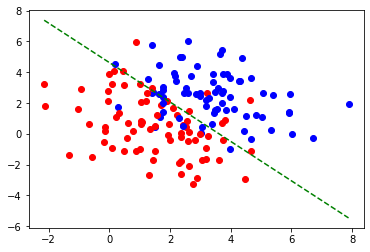

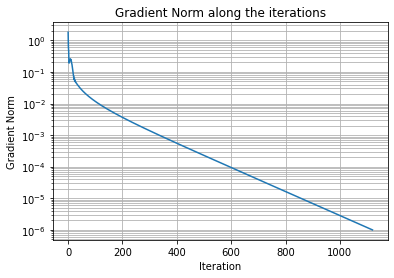

In [ ]:
# Define Parameters
max_it = 100000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)


# Define initial conditions
r_0 = 0.0
s_0 = np.array([[-1.0,-1.0,r_0]])

# Solve problem using gradient descent method
[s,n,grad_norm] = gradient_descent(f,grad_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_GDM(x,y,s,grad_norm,0)

###Task 3

s =  [0.74021451 2.35765419] , r =  4.555298359498374


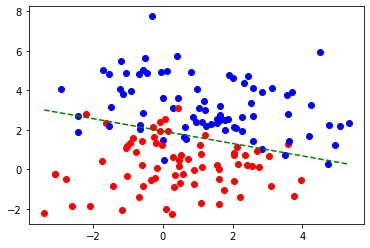

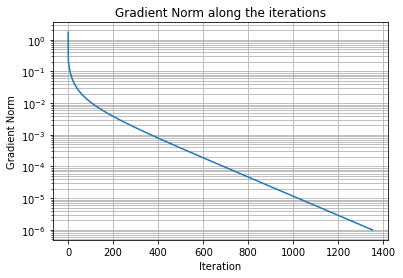

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data2.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)


# Define Parameters
max_it = 100000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)

# Define initial conditions
r_0 = 0.0
s_0 = np.array([[-1.0,-1.0,r_0]])

# Solve problem using gradient descent method
[s,n,grad_norm] = gradient_descent(f,grad_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_GDM(x,y,s,grad_norm,0)

### Task 4

s =  [-1.30819994  1.40779484  0.80483764 -1.00242623  0.55479616 -0.54889073
 -1.19971719  0.07920047 -1.82788311 -0.14842106  1.92407961 -0.35856866
 -0.28996061  0.19244907  1.06137231  0.21072061 -0.09287398  1.04758451
 -1.12480269 -1.33102912  0.766101   -0.27285233 -0.53488113  0.99955867
 -0.41912795 -0.31330725  0.40750042 -0.19651898 -0.73792159 -0.9814172 ] , r =  4.798283022871854


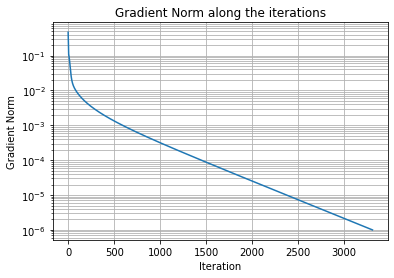

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data3.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]
n = x.shape[0]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)

# Define Parameters
max_it = 100000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)

# Define initial conditions
r_0 = np.array([[0.0]])
s_0 = np.concatenate((-1*np.ones((1,n)),r_0),axis=1)

# Solve problem using gradient descent method
[s,n,grad_norm] = gradient_descent(f,grad_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_GDM(x,y,s,grad_norm,1)

s =  [ 0.08507181 -0.53284872  0.08511819  1.02740394 -1.36570589  0.85178323
  0.04024671  0.69177045  0.26002418  0.61512786 -0.48785441  0.52181992
  1.13524882  0.12757803  1.9290867  -0.06963952 -0.78954591  2.06010427
 -0.71996167 -1.37434611  0.54277877 -0.3897665   1.36212642  0.75231356
 -1.02529878 -0.63534786 -0.41048803  0.85497017  0.07205946 -0.9078732
 -1.05373677 -1.69134799 -0.21341428 -0.29584211 -0.28404926 -2.13140351
 -0.25618559 -0.41090681  0.60269697  0.47763106 -0.87357888  0.52912438
  0.31051886 -0.1314203   0.02774007  0.79951946 -0.24005966  0.52985791
  0.6568265   0.6340224   0.24152894  0.13471644  0.56088716  1.70733532
  0.91572198  0.43985359 -0.47944703  0.95237388 -0.46949051  0.00399298
  0.39132258 -1.96813355 -0.95747903 -2.21407203  0.05561154  0.08587514
 -0.52010392  0.16137909  0.55206801 -0.87224906 -0.27114021 -0.2675114
 -0.89921831 -0.69150604 -0.26177028 -0.40126249 -0.08658637 -0.13513256
  1.88436722 -1.02742202 -0.71300548 -2.06598362

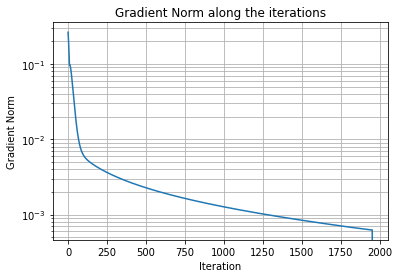

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data4.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]
n = x.shape[0]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)

# Define Parameters
max_it = 100000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)

# Define initial conditions
r_0 = np.array([[0.0]])
s_0 = np.concatenate((-1*np.ones((1,n)),r_0),axis=1)

# Solve problem using gradient descent method
[s,n,grad_norm] = gradient_descent(f,grad_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_GDM(x,y,s,grad_norm,1)

## 3 - Newton Method

In [ ]:
def newton_method(f,grad_f,grad2_f,s_0,x,y,max_it,err_max,alpha_in,beta,lam):
    ## Initializations
    s = s_0.copy()
    n = s.shape[1]
    grad_norm = []
    alpha = alpha_in
    alpha_out = []

    ## Start Gradient Descent iterations
    for l in range(max_it):

        # Calculate Gradient and Hessian matrix
        grad = grad_f(s,x,y)
        hessian = hessian_f(s,x,y)
        
        # Save the norm of the gradient and learning rate in lists
        grad_norm.append(np.linalg.norm(grad.reshape(n), n))
        alpha_out.append(alpha)

        # Check stopping criterion
        if grad_norm[l] < err_max:
            return s, l, grad_norm, alpha_out

        d = np.linalg.solve(hessian,-1*grad.T)
        
        # Backtracking routine
        alpha = alpha_in # Reset alpha value
        while f(s+alpha*d.T,x,y) >= f(s,x,y) + lam*(grad@(alpha*d)):
            alpha = alpha*beta

        # Update
        s += alpha * d.T

    return np.zeros((1,n)), l, grad_norm, alpha_out

In [ ]:
def plot_NM(s,grad,alpha):
    print("s = ",s,", r = ",s[0,s.shape[1]-1])

    # Plot norm of gradient over the iterations
    plt.figure(1)
    plt.yscale('log')
    plt.plot(range(len(grad)),grad)
    plt.xlabel('Iteration')
    plt.ylabel('Gradient Norm')
    plt.title('Gradient Norm along the iterations')
    plt.grid(True, which="both", ls="-")
    plt.show()

    plt.figure(2)
    plt.plot(range(len(alpha)), alpha,'-o')
    plt.xlabel('Iteration')
    plt.ylabel(r'$\alpha_k$')
    plt.title(r'$\alpha_k$ along the iterations (Newton Method)')
    plt.show()

In [ ]:
# Hessian Matrix Calculation
def hessian_f(s,x,y): 
    k = y.shape[1]

    # Calculate vector of second derivatives (for each of the data point)
    deriv = 1/k*np.exp(s@x) / ((1+np.exp(s@x))*(1+np.exp(s@x))) 

    # Create diagonal matrix of second derivatives
    D = np.diag(deriv[0])
    
    # Calculate hessian matrix
    hessian = x@D@x.T
    return hessian

### Task 6

#### data1.mat

s =  [[1.34956971 1.05399169 4.88165543]] , r =  4.881655427380695


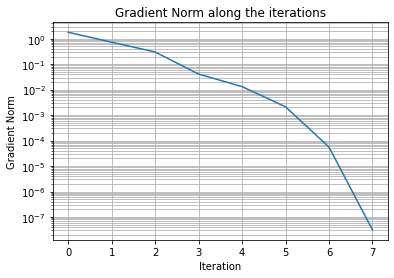

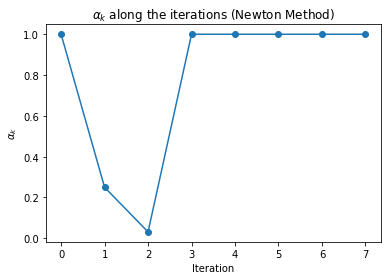

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data1.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]
n = x.shape[0]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)

# Define Parameters
max_it = 1000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)

# Define initial conditions
r_0 = np.array([[0.0]])
s_0 = np.concatenate((-1*np.ones((1,n)),r_0),axis=1)

# Solve problem using gradient descent method
[s,n,grad_norm,alpha] = newton_method(f,grad_f,hessian_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_NM(s,grad_norm,alpha)

#### data2.mat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


s =  [[0.74023619 2.35771794 4.55543717]] , r =  4.55543717406476


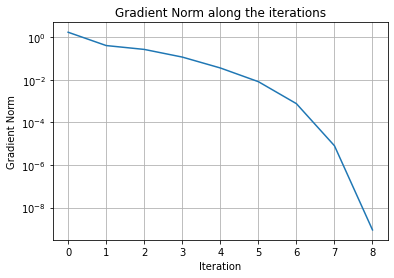

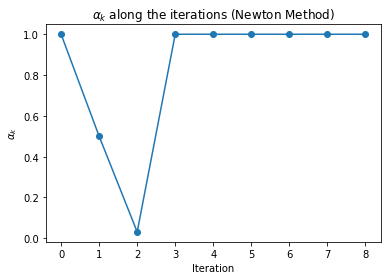

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data2.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]
n = x.shape[0]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)

# Define Parameters
max_it = 1000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)

# Define initial conditions
r_0 = np.array([[0.0]])
s_0 = np.concatenate((-1*np.ones((1,n)),r_0),axis=1)

# Solve problem using gradient descent method
[s,n,grad_norm,alpha] = newton_method(f,grad_f,hessian_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_NM(s,grad_norm,alpha)

#### data3.mat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


s =  [[-1.3083021   1.40790665  0.80489886 -1.00249937  0.55483574 -0.54893653
  -1.1998109   0.0792088  -1.82802124 -0.14843799  1.92422663 -0.3585912
  -0.2899805   0.19247152  1.06145893  0.21073187 -0.09288778  1.04766434
  -1.12489005 -1.331141    0.76616133 -0.27286532 -0.53492658  0.999634
  -0.41916145 -0.31332645  0.40753379 -0.19652918 -0.73798042 -0.98149045
   4.79868878]] , r =  4.798688775959883


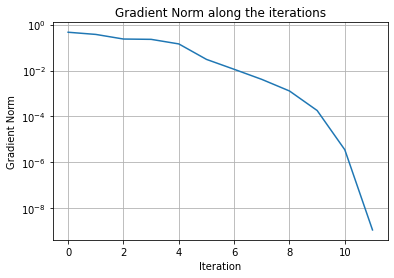

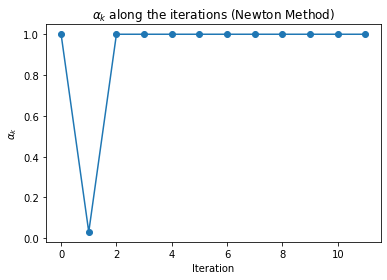

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data3.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]
n = x.shape[0]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)

# Define Parameters
max_it = 1000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)

# Define initial conditions
r_0 = np.array([[0.0]])
s_0 = np.concatenate((-1*np.ones((1,n)),r_0),axis=1)

# Solve problem using gradient descent method
[s,n,grad_norm,alpha] = newton_method(f,grad_f,hessian_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_NM(s,grad_norm,alpha)

#### data4.mat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


s =  [[ 9.54217928e-02 -5.80588470e-01  9.28349084e-02  1.12150138e+00
  -1.48804694e+00  9.26895292e-01  4.43158517e-02  7.52398129e-01
   2.84229046e-01  6.71401913e-01 -5.31274078e-01  5.68845898e-01
   1.23504226e+00  1.38637472e-01  2.10170134e+00 -7.56949481e-02
  -8.59072682e-01  2.24133083e+00 -7.84276708e-01 -1.49773149e+00
   5.87466643e-01 -4.26487321e-01  1.48288782e+00  8.19398749e-01
  -1.11632183e+00 -6.89982912e-01 -4.44409901e-01  9.31978811e-01
   7.97135264e-02 -9.89088241e-01 -1.14839978e+00 -1.84238582e+00
  -2.30089782e-01 -3.20237034e-01 -3.12242947e-01 -2.32087850e+00
  -2.80691336e-01 -4.46791594e-01  6.57265153e-01  5.21428942e-01
  -9.52508759e-01  5.76520009e-01  3.38648605e-01 -1.41140343e-01
   2.83935310e-02  8.68843238e-01 -2.60659310e-01  5.77167103e-01
   7.14265092e-01  6.89600235e-01  2.62246493e-01  1.47531146e-01
   6.12338868e-01  1.85913526e+00  9.97372625e-01  4.78657543e-01
  -5.21072000e-01  1.03762457e+00 -5.10880166e-01  5.87709240e-03
   4.

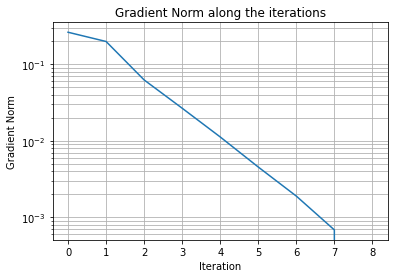

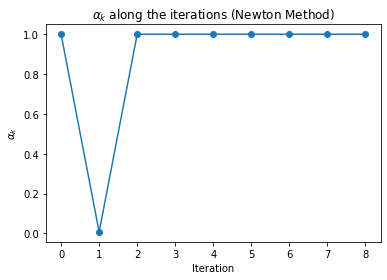

In [ ]:
# Import data (for matlab .mat file)
mat_contents = sp.loadmat("data4.mat")

x = mat_contents['X']
y = mat_contents['Y']
# Number of data points
k = y.shape[1]
n = x.shape[0]

# Add line with all values -1 (to multiply by the r contained in the s vector)
x = np.concatenate((x, -1*np.ones((1,k))), axis=0)

# Define Parameters
max_it = 1000
er_max = 10**(-6)
alpha = 1.0
beta = 0.5
lam = 10**(-4)

# Define initial conditions
r_0 = np.array([[0.0]])
s_0 = np.concatenate((-1*np.ones((1,n)),r_0),axis=1)

# Solve problem using gradient descent method
[s,n,grad_norm,alpha] = newton_method(f,grad_f,hessian_f,s_0,x,y,max_it,er_max,alpha,beta,lam)

# Plot Results
plot_NM(s,grad_norm,alpha)